In [1]:
import requests

# API endpoint URL
url = 'https://openpaymentsdata.cms.gov/api/1/metastore/schemas/dataset/items/fb3a65aa-c901-4a38-a813-b04b00dfa2a9'
params = {
    'show-reference-ids': 'false'
}
headers = {
    'accept': 'application/json'
}

# Sending the GET request
response = requests.get(url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print("Data retrieved successfully:")
    print(data)
else:
    print('Failed to fetch data:', response.status_code, response.text)


Data retrieved successfully:
{'bureauCode': ['009:38'], 'programCode': ['009:000'], 'accessLevel': 'public', 'keyword': [{'identifier': '9409f61b-252f-5359-ac36-8d6684df11fb', 'data': '2023'}], 'contactPoint': {'fn': 'Open Payments', 'hasEmail': 'mailto:openpayments@cms.hhs.gov'}, 'dataQuality': True, 'description': 'All general (non-research, non-ownership related) payments from the 2023 program year [January 1 – December 31, 2023]<p><strong>NOTE: </strong>This is a very large file and, depending on your network characteristics and software, may take a long time to download or fail to download. Additionally, the number of rows in the file may be larger than the maximum rows your version of <a href="https://support.microsoft.com/en-us/office/excel-specifications-and-limits-1672b34d-7043-467e-8e27-269d656771c3">Microsoft Excel</a> supports. If you can\'t download the file, we recommend engaging your IT support staff. If you are able to download the file but are unable to open it in MS E

In [2]:
import requests

download_url = 'https://download.cms.gov/openpayments/PGYR23_P062824/OP_DTL_GNRL_PGYR2023_P06282024_06122024.csv'
response = requests.get(download_url, stream=True)

with open('Open_Payments_Data.csv', 'wb') as file:
    for chunk in response.iter_content(chunk_size=1024*1024):  # Download in chunks of 1 MB
        file.write(chunk)


In [24]:
import pandas as pd

df = pd.read_csv("Open_Payments_Data.csv")

# Display the first few rows of the DataFrame to confirm it loaded correctly
print(df.head())



/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,8,10,12,15,17,18,20,21,22,23,24,26,27,28,32,33,34,35,39,46,47,48,49,51,52,53,54,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


  Change_Type       Covered_Recipient_Type  Teaching_Hospital_CCN  \
0         NEW  Covered Recipient Physician                    NaN   
1         NEW  Covered Recipient Physician                    NaN   
2         NEW  Covered Recipient Physician                    NaN   
3         NEW  Covered Recipient Physician                    NaN   
4         NEW  Covered Recipient Physician                    NaN   

   Teaching_Hospital_ID Teaching_Hospital_Name  Covered_Recipient_Profile_ID  \
0                   NaN                    NaN                      287788.0   
1                   NaN                    NaN                      271599.0   
2                   NaN                    NaN                      336633.0   
3                   NaN                    NaN                     1095727.0   
4                   NaN                    NaN                     1256215.0   

   Covered_Recipient_NPI Covered_Recipient_First_Name  \
0           1.356428e+09                       

In [25]:
# List of columns you want to drop from the DataFrame
columns_to_drop = ['Change_Type','Recipient_Primary_Business_Street_Address_Line1','Recipient_Primary_Business_Street_Address_Line2',
                   'Recipient_Zip_Code','Covered_Recipient_Name_Suffix','Covered_Recipient_NPI','Covered_Recipient_Profile_ID',
    'Teaching_Hospital_CCN', 'Teaching_Hospital_ID', 'Teaching_Hospital_Name'
    , 'Recipient_Postal_Code',
    'Covered_Recipient_Primary_Type_2', 'Covered_Recipient_Primary_Type_3',
    'Covered_Recipient_Primary_Type_4', 'Covered_Recipient_Primary_Type_5',
    'Covered_Recipient_Primary_Type_6', 'Covered_Recipient_Specialty_2',
    'Covered_Recipient_Specialty_3', 'Covered_Recipient_Specialty_4',
    'Covered_Recipient_Specialty_5', 'Covered_Recipient_Specialty_6',
    'Covered_Recipient_License_State_code2', 'Covered_Recipient_License_State_code3',
    'Covered_Recipient_License_State_code4', 'Covered_Recipient_License_State_code5',
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID','City_of_Travel','State_of_Travel', 'Country_of_Travel',
    'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
    'Third_Party_Equals_Covered_Recipient_Indicator','Delay_in_Publication_Indicator',
    'Record_ID','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
    'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
    'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5',
    'Associated_Drug_or_Biological_NDC_1', 'Associated_Drug_or_Biological_NDC_2',
    'Associated_Drug_or_Biological_NDC_3', 'Associated_Drug_or_Biological_NDC_4',
    'Associated_Drug_or_Biological_NDC_5', 'Associated_Device_or_Medical_Supply_PDI_1',
    'Associated_Device_or_Medical_Supply_PDI_2', 'Associated_Device_or_Medical_Supply_PDI_3',
    'Associated_Device_or_Medical_Supply_PDI_4', 'Associated_Device_or_Medical_Supply_PDI_5',
    'Program_Year','Payment_Publication_Date'
]

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Verify by displaying the columns of the DataFrame
print(df.columns)


Index(['Covered_Recipient_Type', 'Covered_Recipient_First_Name',
       'Covered_Recipient_Middle_Name', 'Covered_Recipient_Last_Name',
       'Recipient_City', 'Recipient_State', 'Recipient_Country',
       'Recipient_Province', 'Covered_Recipient_Primary_Type_1',
       'Covered_Recipient_Specialty_1',
       'Covered_Recipient_License_State_code1',
       'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
       'Total_Amount_of_Payment_USDollars', 'Date_of_Payment',
       'Number_of_Payments_Included_in_Total_Amount',
       'Form_of_Payment_or_Transfer_of_Value',
       'Nature_of_Payment_or_Transfer_of_Value',
       'Physician_Ownership_Indicator',
       'Third_Party_Payment_Recipient_Indicator', 'Charity_Indicator',
       'Contextual_Information', '

In [26]:
columns_to_check = [
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5'
]

# Check if any of the columns contain the string "Device"
contains_device = df[columns_to_check].apply(lambda x: x.str.contains('Device', na=False)).any(axis=1)

In [27]:
# Count the True values in the series
device_count = contains_device.sum()

# Print the count
print(f"Number of records with 'Device' in any specified column: {device_count}")

Number of records with 'Device' in any specified column: 2993178


In [28]:
import pandas as pd

# Assuming df is your loaded DataFrame
# List of columns to check for the presence of the string "Device"
columns_to_check = [
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5'
]

# Apply a filter across these columns to retain rows where any column contains "Device"
filtered_df = df[
    df[columns_to_check].apply(lambda x: x.str.contains('Device', na=False)).any(axis=1)
]

# Now filtered_df will only contain rows where at least one of the specified columns has "Device"
print(filtered_df)

                       Covered_Recipient_Type Covered_Recipient_First_Name  \
0                 Covered Recipient Physician                           SY   
1                 Covered Recipient Physician                        JAMES   
2                 Covered Recipient Physician                        PETER   
3                 Covered Recipient Physician                          LEO   
4                 Covered Recipient Physician                        KARRI   
...                                       ...                          ...   
14597423          Covered Recipient Physician                      MICHAEL   
14597424          Covered Recipient Physician                      MICHAEL   
14597425          Covered Recipient Physician                      MICHAEL   
14597426          Covered Recipient Physician                      MICHAEL   
14597432  Covered Recipient Teaching Hospital                          NaN   

         Covered_Recipient_Middle_Name Covered_Recipient_Last_N

In [29]:
# Count unique values and their occurrence in each column
submitter_counts = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].value_counts()
payer_counts = filtered_df['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'].value_counts()

# Print the counts
print("Counts of unique submitters:")
print(submitter_counts)
print("\nCounts of unique payers:")
print(payer_counts)


Counts of unique submitters:
Abbott Laboratories                   311003
Medtronic, Inc.                       303123
Boston Scientific Corporation         227540
Stryker Corporation                   139743
Intuitive Surgical, Inc.              102492
                                       ...  
KARL STORZ Endoscopia Mexico, S.A.         1
Dentsply IH Sweden                         1
Kirwan Surgical Products LLC               1
Urotronic, Inc                             1
Qiagen, LLC                                1
Name: Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name, Length: 801, dtype: int64

Counts of unique payers:
Abbott Laboratories               311003
Medtronic, Inc.                   303123
Boston Scientific Corporation     227540
Stryker Corporation               139743
Intuitive Surgical, Inc.          102492
                                   ...  
Urotronic, Inc                         1
DENTSPLY SIRONA Pty Limited            1
LifeNet Health                 

In [30]:
# Filter the DataFrame for names starting with 'A'
mask = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].str.startswith('3')

# Extract the names from the column that match the filter and find unique entries
unique_names_starting_with_a = filtered_df.loc[mask, 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].unique()

# Display the unique filtered names
print(unique_names_starting_with_a)


['3Shape Inc' '3Shape A/S' '3M Company']


In [31]:
import pandas as pd

# Define replacements in a dictionary
replacements = {
    'Alcon Vision LLC': 'Alcon Inc.',
    'Alcon Puerto Rico Inc': 'Alcon Inc.',
    'Alcon Research LLC': 'Alcon Inc.'
}

# Replace values in the DataFrame
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(replacements)


<ipython-input-31-f45ac029f297>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(replacements)


In [32]:
import pandas as pd

# Define the column name for clarity and maintainability
column_name = 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'

# List of Olympus-related names to be replaced
olympus_variants = [
    'Olympus Winter & Ibe GmbH', 'Olympus Latin America, Inc.',
    'Olympus Medical Systems Corporation', 'Olympus Corporation',
    'Olympus America Inc.', 'Olympus Corporation of the Americas'
]

# Replace these names with 'Olympus' in the DataFrame
filtered_df[column_name] = filtered_df[column_name].replace(olympus_variants, 'Olympus')


<ipython-input-32-82c32199b286>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[column_name] = filtered_df[column_name].replace(olympus_variants, 'Olympus')


In [33]:
import pandas as pd

# Define a regex pattern that matches all variations of "Johnson & Johnson" and "Johnson and Johnson"
pattern = r'Johnson\s*(?:&|and)\s*Johnson.*'

# Replace the values in the DataFrame
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value='Johnson & Johnson', regex=True)


<ipython-input-33-cd9c8cfc7a02>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value='Johnson & Johnson', regex=True)


In [34]:
import pandas as pd

# Regular expression to match any string starting with "B. Braun"
pattern = r'B\. Braun.*'

# Replace variations of "B. Braun" with "B. Braun"
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value='B. Braun', regex=True)


<ipython-input-34-a006889083d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value='B. Braun', regex=True)


In [35]:
import pandas as pd

# Define the variations that need to be standardized
variations = ['GE HEALTHCARE', 'GE HealthCare']

# Replace variations with 'GE Healthcare'
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(variations, 'GE Healthcare')


<ipython-input-35-2d13bb36b069>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(variations, 'GE Healthcare')


In [36]:
# Define the replacements in a dictionary
replacements = {
    'Fresenius USA Marketing, Inc.': 'Fresenius Medical Care',
    'Fresenius Kabi USA, LLC': 'Fresenius Medical Care'
}

# Apply the replacements to the GPO name column
# Replace the column name with your actual GPO name column if it differs
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(replacements)



<ipython-input-36-6d1ff047f066>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(replacements)


In [37]:
import pandas as pd

# Regex pattern to match the FUJIFILM variations
pattern = r'FUJIFILM.*'

# Replacement value
replacement = 'Fujifilm Holdings Corporation'

# Apply the replacement in the 'GPO Name' column (replace 'GPO Name' with your actual column name)
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value=replacement, regex=True)


<ipython-input-37-4daa44c27b93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value=replacement, regex=True)


In [38]:
import pandas as pd

# List of companies to filter by
companies = [
    'Zimmer Biomet Holdings, Inc.', 'Medtronic, Inc.','Johnson & Johnson', 'Stryker Corporation', 
    'Abbott Laboratories', 'Boston Scientific Corporation','Intuitive Surgical, Inc.', 'Siemens Medical Solutions USA, Inc.', 
    'Becton, Dickinson and Company','Philips Electronics North America Corporation','Baxter Healthcare','3M Company',
    'Alcon Inc.','Olympus','B. Braun','GE Healthcare','Fresenius Medical Care','Fujifilm Holdings Corporation','ABBVIE INC.','Arthrex, Inc.'
]
 
# Filter the DataFrame to only include rows where the company name is in the list
filtered_records = filtered_df[filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].isin(companies)]

# Display the filtered DataFrame
print(filtered_records)


                       Covered_Recipient_Type Covered_Recipient_First_Name  \
838861            Covered Recipient Physician                          BEN   
838862            Covered Recipient Physician                         SANA   
838863            Covered Recipient Physician                      TAUSEEF   
838864            Covered Recipient Physician                    ANNABELLE   
838865            Covered Recipient Physician                    ANNABELLE   
...                                       ...                          ...   
14105390          Covered Recipient Physician                       NICOLE   
14105408          Covered Recipient Physician                        RALPH   
14105409          Covered Recipient Physician                        DAVID   
14594067          Covered Recipient Physician                   ANKITKUMAR   
14594492  Covered Recipient Teaching Hospital                          NaN   

         Covered_Recipient_Middle_Name Covered_Recipient_Last_N

In [51]:
import pandas as pd

# List of companies to filter by
companies = [
    'Zimmer Biomet Holdings, Inc.', 'Medtronic, Inc.','Johnson & Johnson', 'Stryker Corporation', 
    'Abbott Laboratories', 'Boston Scientific Corporation','Intuitive Surgical, Inc.', 'Siemens Medical Solutions USA, Inc.',
    'Philips Electronics North America Corporation','Baxter Healthcare','3M Company','DePuy Synthes Sales Inc.','Smith+Nephew, Inc.',
    'Alcon Inc.','Olympus','ABBVIE INC.','Arthrex, Inc.','ATRICURE, INC.','ENCORE MEDICAL, LP','LivaNova USA, Inc.'
]

# Assuming the column 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name' is where the GPO names are stored
# Filter 'filtered_df' to only include rows where the GPO name is in the list
finaldf = filtered_df[filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].isin(companies)]

# Display the first few rows of the newly created DataFrame to verify
print(finaldf.head())

# Optionally, you can also check the shape of the DataFrame to understand how many records match the criteria
print("Number of records in finaldf:", finaldf.shape[0])


             Covered_Recipient_Type Covered_Recipient_First_Name  \
838861  Covered Recipient Physician                          BEN   
838862  Covered Recipient Physician                         SANA   
838863  Covered Recipient Physician                      TAUSEEF   
838864  Covered Recipient Physician                    ANNABELLE   
838865  Covered Recipient Physician                    ANNABELLE   

       Covered_Recipient_Middle_Name Covered_Recipient_Last_Name  \
838861                           NaN                         RAD   
838862                           NaN                     QURESHI   
838863                           NaN                     QURESHI   
838864                           NaN                      QUIZON   
838865                           NaN                      QUIZON   

       Recipient_City Recipient_State Recipient_Country Recipient_Province  \
838861         FRESNO              CA     United States                NaN   
838862         POMONA     

In [52]:
# Save finaldf to a CSV file
finaldf.to_csv('FinalDataFrame.csv', index=False)


In [53]:
df = pd.read_csv("FinalDataFrame.csv")

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,7,22,23,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


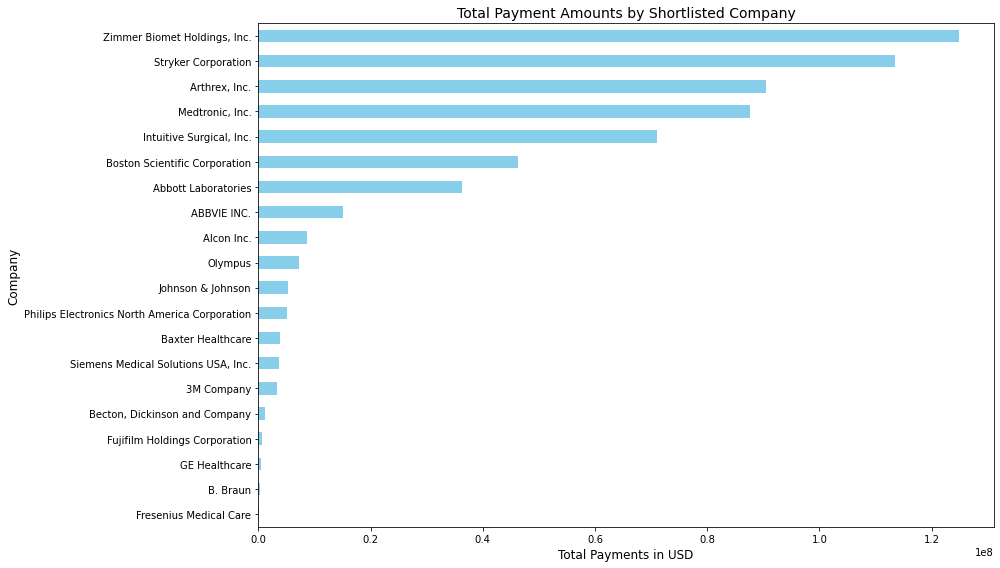

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
# Increase the size of the plot
plt.figure(figsize=(14, 8))  # Adjust width to give more space

# Aggregate total payments by company and sort them in descending order
company_payments = filtered_records.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name')['Total_Amount_of_Payment_USDollars'].sum().sort_values(ascending=False)

# Plot total payments by company in descending order using a horizontal bar plot for better label management
company_payments.plot(kind='barh', color='skyblue')  # Use 'barh' for horizontal bars
plt.title('Total Payment Amounts by Shortlisted Company', fontsize=14)
plt.xlabel('Total Payments in USD', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.yticks(rotation=0, fontsize=10)  # Adjust rotation and font size if necessary
plt.gca().invert_yaxis()  # Invert axis to have the highest value on top
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


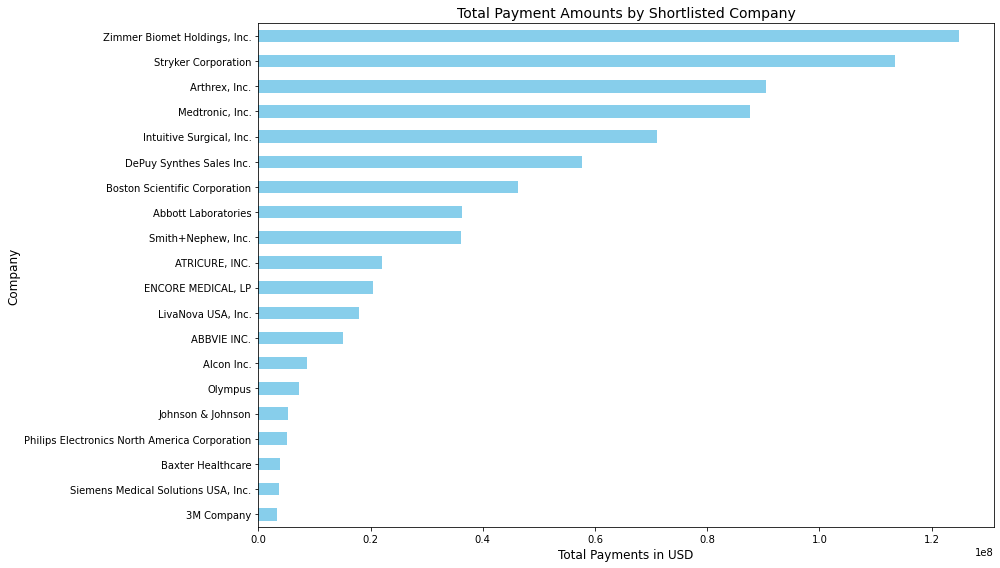

In [55]:
plt.figure(figsize=(14, 8))  # Adjust width to give more space

# Aggregate total payments by company and sort them in descending order
company_payments = df.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name')['Total_Amount_of_Payment_USDollars'].sum().sort_values(ascending=False)

# Plot total payments by company in descending order using a horizontal bar plot for better label management
company_payments.plot(kind='barh', color='skyblue')  # Use 'barh' for horizontal bars
plt.title('Total Payment Amounts by Shortlisted Company', fontsize=14)
plt.xlabel('Total Payments in USD', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.yticks(rotation=0, fontsize=10)  # Adjust rotation and font size if necessary
plt.gca().invert_yaxis()  # Invert axis to have the highest value on top
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

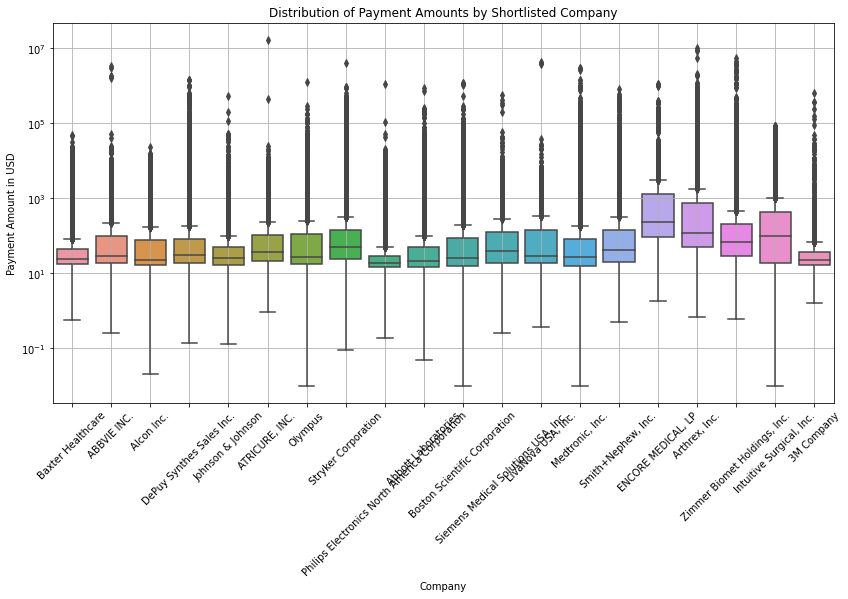

In [56]:
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.boxplot(
    x='Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
    y='Total_Amount_of_Payment_USDollars',
    data=df
)
plt.title('Distribution of Payment Amounts by Shortlisted Company')
plt.ylabel('Payment Amount in USD')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.yscale('log')  # Use logarithmic scale to better display outliers
plt.grid(True)
plt.show()


In [57]:
# Summarize data by company and coverage indicator
coverage_summary = df.groupby(['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Covered_or_Noncovered_Indicator_1']).size().unstack(fill_value=0)

# Summarize data by company and product type
product_type_summary = df.groupby(['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1']).size().unstack(fill_value=0)

# Summarize data by company and therapeutic area
therapeutic_summary = df.groupby(['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Product_Category_or_Therapeutic_Area_1']).size().unstack(fill_value=0)

print(coverage_summary)
print(product_type_summary)
print(therapeutic_summary)


Covered_or_Noncovered_Indicator_1                   Covered  Non-Covered
Submitting_Applicable_Manufacturer_or_Applicabl...                      
3M Company                                             9482           24
ABBVIE INC.                                           22533            0
ATRICURE, INC.                                        24961            0
Abbott Laboratories                                  309711         1292
Alcon Inc.                                            76260         4547
Arthrex, Inc.                                          1929          223
Baxter Healthcare                                     22747         1710
Boston Scientific Corporation                        150408        77132
DePuy Synthes Sales Inc.                              28460          160
ENCORE MEDICAL, LP                                     4480           25
Intuitive Surgical, Inc.                             102492            0
Johnson & Johnson                                  

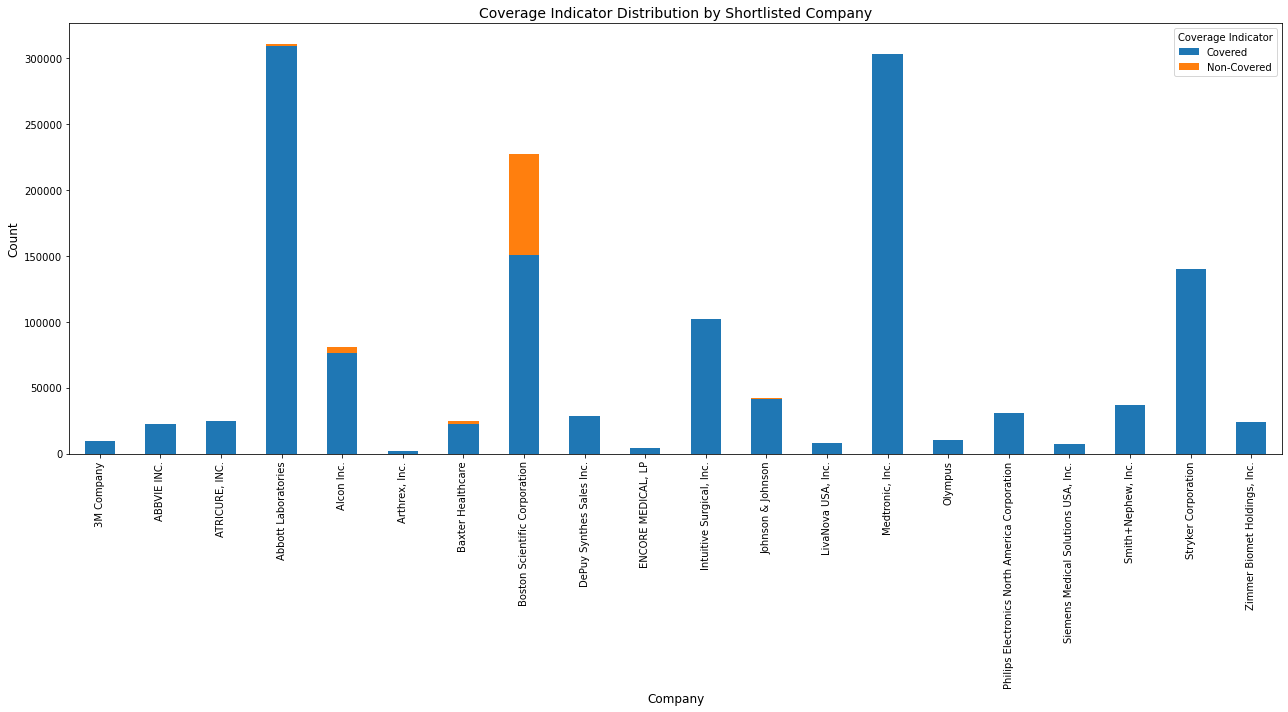

In [60]:
import matplotlib.pyplot as plt

# Visualize coverage indicator distribution with adjusted label alignment and rotation
coverage_summary.plot(kind='bar', figsize=(18, 10), stacked=True)
plt.title('Coverage Indicator Distribution by Shortlisted Company', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Company', fontsize=12)
plt.xticks(rotation=90, ha='center')  # Rotate labels to 90 degrees and adjust alignment to center
plt.yticks(fontsize=10)
plt.legend(title='Coverage Indicator', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


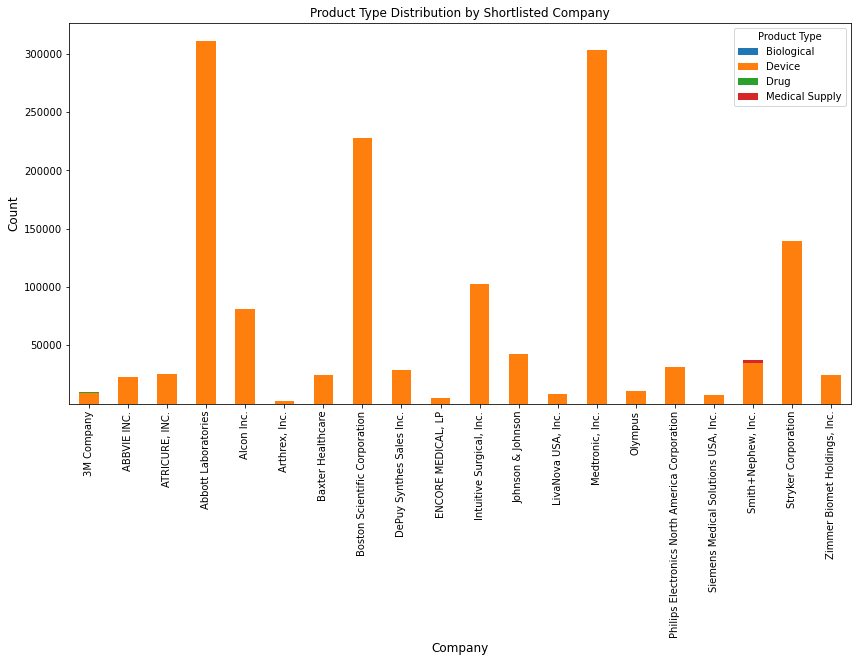

In [61]:
# Visualize product type distribution
product_type_summary.plot(kind='bar', figsize=(14, 7), stacked=True)
plt.title('Product Type Distribution by Shortlisted Company')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Company', fontsize=12)
plt.xticks(rotation=90, ha='center')  # Rotate labels to 90 degrees and adjust alignment to center
plt.yticks(fontsize=10)
plt.legend(title='Product Type')
plt.show()


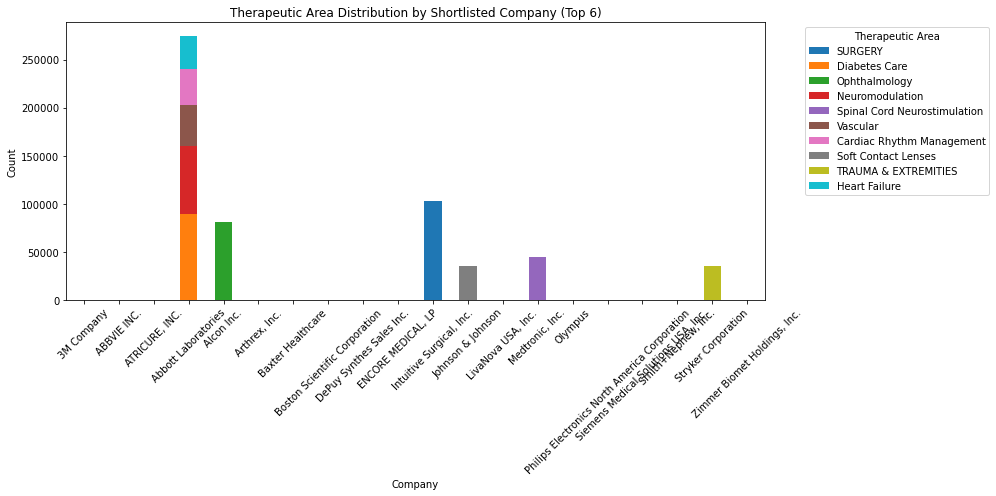

In [62]:
# Visualize therapeutic area distribution (Top 10 most common for readability)
top_therapeutic_areas = therapeutic_summary.sum(axis=0).nlargest(10).index
filtered_therapeutic_summary = therapeutic_summary[top_therapeutic_areas]
filtered_therapeutic_summary.plot(kind='bar', figsize=(14, 7), stacked=True)
plt.title('Therapeutic Area Distribution by Shortlisted Company (Top 6)')
plt.ylabel('Count')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.legend(title='Therapeutic Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [63]:
import pandas as pd

# Convert the payment amount column to float if it's not already
df['Total_Amount_of_Payment_USDollars'] = pd.to_numeric(df['Total_Amount_of_Payment_USDollars'], errors='coerce')


In [65]:
# Aggregate total payments by company
total_payments_by_company = df.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name')['Total_Amount_of_Payment_USDollars'].sum()

# Sort the results in descending order and get the top 10
top_10_companies_by_payment = total_payments_by_company.sort_values(ascending=False).head(20)

# Print the top 10 companies and their total payment amounts
print(top_10_companies_by_payment)


Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name
Zimmer Biomet Holdings, Inc.                     1.247992e+08
Stryker Corporation                              1.134212e+08
Arthrex, Inc.                                    9.051638e+07
Medtronic, Inc.                                  8.761146e+07
Intuitive Surgical, Inc.                         7.096773e+07
DePuy Synthes Sales Inc.                         5.774663e+07
Boston Scientific Corporation                    4.622861e+07
Abbott Laboratories                              3.621437e+07
Smith+Nephew, Inc.                               3.612286e+07
ATRICURE, INC.                                   2.201579e+07
ENCORE MEDICAL, LP                               2.045211e+07
LivaNova USA, Inc.                               1.788977e+07
ABBVIE INC.                                      1.515422e+07
Alcon Inc.                                       8.687618e+06
Olympus                                          7.227953e+06
Johnson & Jo

In [67]:
import pandas as pd

# Convert the payment amount column to float if it's not already
df['Total_Amount_of_Payment_USDollars'] = pd.to_numeric(df['Total_Amount_of_Payment_USDollars'], errors='coerce')

# Aggregate total payments by company
total_payments_by_company = df.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name')['Total_Amount_of_Payment_USDollars'].sum()

# Sort the results in descending order and get the top 20
top_20_companies_by_payment = total_payments_by_company.sort_values(ascending=False).head(20)

# Format the amounts to be more readable and print the top 10 companies and their total payment amounts
formatted_payments = top_20_companies_by_payment.apply(lambda x: f"${x:,.2f}")
print(formatted_payments)


Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name
Zimmer Biomet Holdings, Inc.                     $124,799,169.81
Stryker Corporation                              $113,421,182.93
Arthrex, Inc.                                     $90,516,383.79
Medtronic, Inc.                                   $87,611,457.99
Intuitive Surgical, Inc.                          $70,967,731.75
DePuy Synthes Sales Inc.                          $57,746,631.74
Boston Scientific Corporation                     $46,228,609.45
Abbott Laboratories                               $36,214,365.10
Smith+Nephew, Inc.                                $36,122,860.31
ATRICURE, INC.                                    $22,015,791.89
ENCORE MEDICAL, LP                                $20,452,109.48
LivaNova USA, Inc.                                $17,889,766.34
ABBVIE INC.                                       $15,154,218.94
Alcon Inc.                                         $8,687,618.34
Olympus                         

In [69]:
# Convert payment amounts to numeric, handle errors if present
df['Total_Amount_of_Payment_USDollars'] = pd.to_numeric(df['Total_Amount_of_Payment_USDollars'], errors='coerce')

# Aggregate payments by company and product type
payments_by_company_product = df.groupby(
    ['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1']
)['Total_Amount_of_Payment_USDollars'].sum().unstack(fill_value=0)

# Sum payments by company to identify the top 20
total_payments_by_company = payments_by_company_product.sum(axis=1)
top_20_companies = total_payments_by_company.sort_values(ascending=False).head(20).index

# Filter the detailed breakdown for these top 20 companies
top_20_detailed = payments_by_company_product.loc[top_20_companies]


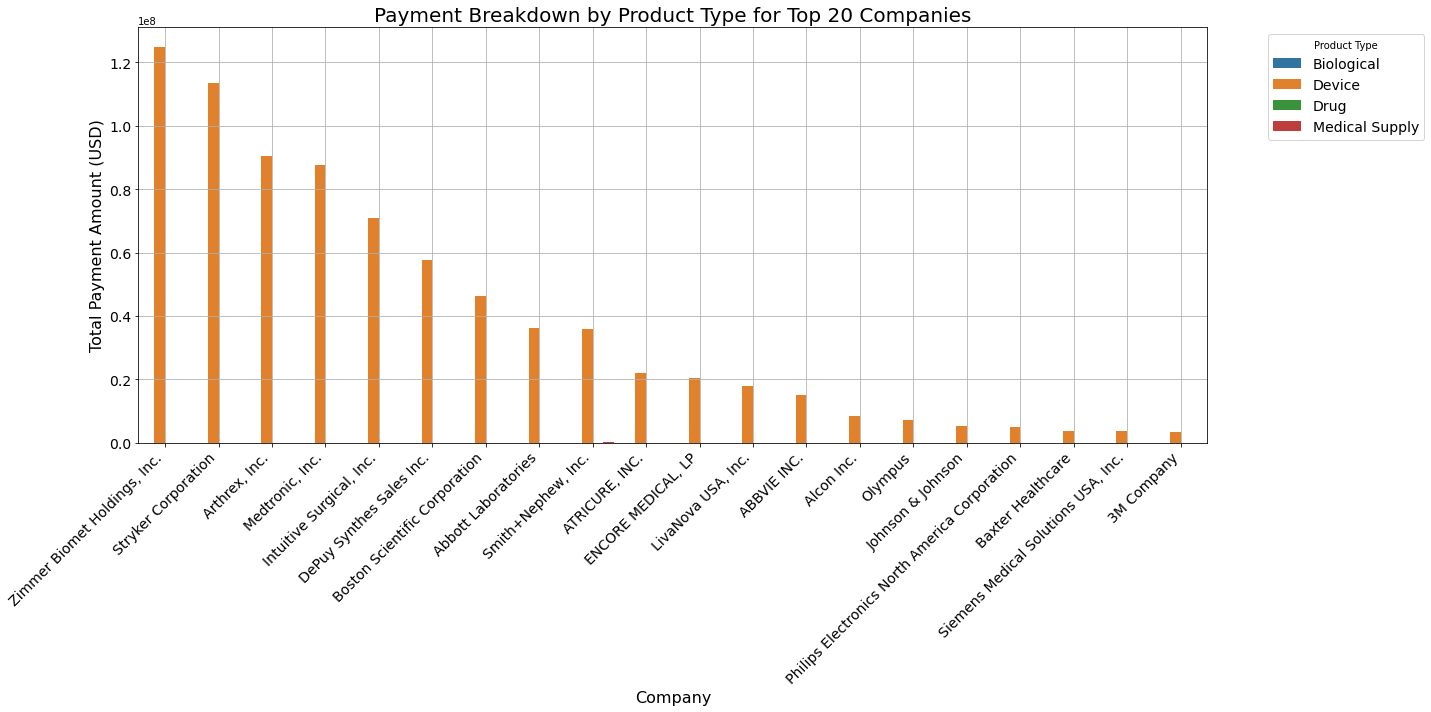

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Large figure size to handle more companies
sns.barplot(
    data=top_20_detailed.reset_index().melt(id_vars='Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', value_vars=top_20_detailed.columns, var_name='Product Type', value_name='Total_Amount_of_Payment_USDollars'),
    x='Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
    y='Total_Amount_of_Payment_USDollars',
    hue='Product Type'
)

plt.title('Payment Breakdown by Product Type for Top 20 Companies', fontsize=20)
plt.xlabel('Company', fontsize=16)
plt.ylabel('Total Payment Amount (USD)', fontsize=16)
plt.xticks(rotation=45, fontsize=14, ha='right')  # Rotate for better visibility
plt.yticks(fontsize=14)
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
top_20_detailed

Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1,Biological,Device,Drug,Medical Supply
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,,,,
"Zimmer Biomet Holdings, Inc.",0.00,1.247992e+08,0.00,0.00
Stryker Corporation,0.00,1.134189e+08,0.00,2296.56
"Arthrex, Inc.",43261.37,9.047312e+07,0.00,0.00
"Medtronic, Inc.",0.00,8.761146e+07,0.00,0.00
"Intuitive Surgical, Inc.",0.00,7.096773e+07,0.00,0.00
DePuy Synthes Sales Inc.,0.00,5.774663e+07,0.00,0.00
Boston Scientific Corporation,0.00,4.622861e+07,0.00,0.00
Abbott Laboratories,0.00,3.621437e+07,0.00,0.00
"Smith+Nephew, Inc.",0.00,3.592994e+07,4752.16,188169.41
